**3	To - Do - Task**

**3.1	Warming Up Exercises - Basic Inspection and Exploration:**

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1.	Load the provided dataset and import in pandas DataFrame.
2.	Check info of the DataFrame and identify following:
(a)	columns with dtypes=object
(b)	unique values of those columns.
(c)	check for the total number of null values in each column.
3.	Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ”.csv” with name ”banknumericdata.csv”
4.	Read ”banknumericdata.csv” and Find the summary statistics.


In [ ]:
import pandas as pd

# 1. Load the provided dataset and import into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/bank .csv")
print("Dataset loaded successfully.")

# 2. Inspect the DataFrame
# (a) Check columns with dtype=object
object_columns = df.select_dtypes(include=['object']).columns
print("\nColumns with dtype=object:")
print(object_columns)

# (b) Find unique values in these object columns
print("\nUnique values for columns with dtype=object:")
for col in object_columns:
    print(f"{col}: {df[col].unique()}")

# (c) Check for the total number of null values in each column
null_values = df.isnull().sum()
print("\nTotal number of null values in each column:")
print(null_values)

# 3. Drop all columns with dtype=object and store in a new DataFrame
df_numeric = df.select_dtypes(exclude=['object'])
df_numeric.to_csv("banknumericdata.csv", index=False)
print("\nNumeric data saved as 'banknumericdata.csv'.")

# 4. Read "banknumericdata.csv" and find summary statistics
df_numeric_read = pd.read_csv("banknumericdata.csv")
summary_statistics = df_numeric_read.describe()
print("\nSummary statistics for the numeric data:")
print(summary_statistics)


Dataset loaded successfully.

Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values for columns with dtype=object:
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']

Total number of null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
p

**Problem 2 - Data Imputations:**

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"
1.	Load the provided dataset and import in pandas DataFrame.
2.	Check info of the DataFrame and identify column with missing (null) values.
3.	For the column with missing values fill the values using various techniques we discussed above. Try to explain why did you select the particular methods for particular column.
4.	Check for any duplicate values present in Dataset and do necessary to manage the duplicate items. {Hint: dataset.duplicated.sum()}


In [ ]:
import pandas as pd

# 1. Load the dataset into a pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/bank .csv")
print("Dataset loaded successfully.")

# 2. Check info of the DataFrame and identify columns with missing (null) values
print("\nDataFrame Info:")
print(df.info())

# Identify columns with missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)

# 3. Fill missing values with appropriate techniques
# Iterate through columns with missing values and fill them
for column in missing_columns.index:
    if df[column].dtype == "object":
        # For categorical columns, fill missing values with the mode
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
        print(f"Filled missing values in column '{column}' with mode: {mode_value}")
    else:
        # For numerical columns, fill missing values with the mean
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
        print(f"Filled missing values in column '{column}' with mean: {mean_value}")

# 4. Check for duplicate values and manage them
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows in the dataset: {duplicates_count}")

# Drop duplicate rows if they exist
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows have been dropped.")

# Save the cleaned dataset for future use
df.to_csv("medical_student_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'medical_student_cleaned.csv'.")


Dataset loaded successfully.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Columns with missing values:
Series([], dtype: 

**3.2	Exercises - Data Cleaning and Transformations with ”Titanic Dataset”**:

**Dataset Used: "titanic.csv"**

**Problem - 1:**

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’. Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean, median, maximum value, and minimum value of the ’Fare’ column?


In [5]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
print("Dataset loaded successfully.")

# Create a subset DataFrame for the specified columns
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retain only rows where 'Pclass' is equal to 1
first_class_df = subset_df[subset_df['Pclass'] == 1]

# Calculate the mean, median, max, and min of the 'Fare' column
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

# Display the results
print("\nStatistics for 'Fare' column for first-class passengers:")
print(f"Mean Fare: {mean_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")
print(f"Maximum Fare: {max_fare:.2f}")
print(f"Minimum Fare: {min_fare:.2f}")


Dataset loaded successfully.

Statistics for 'Fare' column for first-class passengers:
Mean Fare: 84.15
Median Fare: 60.29
Maximum Fare: 512.33
Minimum Fare: 0.00


**Problem - 2:**

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.


In [6]:
# Check for null values in the 'Age' column of the subsetted DataFrame
null_age_count = first_class_df['Age'].isnull().sum()
print(f"\nNumber of null values in the 'Age' column: {null_age_count}")

# Drop rows with null values in the 'Age' column
cleaned_first_class_df = first_class_df.dropna(subset=['Age'])

# Verify that null values have been removed
null_age_count_after = cleaned_first_class_df['Age'].isnull().sum()
print(f"Number of null values in the 'Age' column after dropping: {null_age_count_after}")



Number of null values in the 'Age' column: 30
Number of null values in the 'Age' column after dropping: 0


**Problem - 3:**

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:

•	’C’ for Cherbourg

•	’Q’ for Queenstown

•	’S’ for Southampton

Task:
1.	Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’, ’Embarked Q’, ’Embarked S’).
2.	Add these new columns to the original DataFrame.
3.	Drop the original ’Embarked’ column.
4.	Print the first few rows of the modified DataFrame to verify the changes.



In [8]:
# Perform one-hot encoding for the 'Embarked' column
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')

# Add the new one-hot encoded columns to the original DataFrame
df = pd.concat([df, embarked_one_hot], axis=1)

# Drop the original 'Embarked' column
df.drop('Embarked', axis=1, inplace=True)

# Print the first few rows to verify the changes
print("\nFirst few rows of the modified DataFrame:")
print(df.head())



First few rows of the modified DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250  

**Problem - 4:**

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.



Mean survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


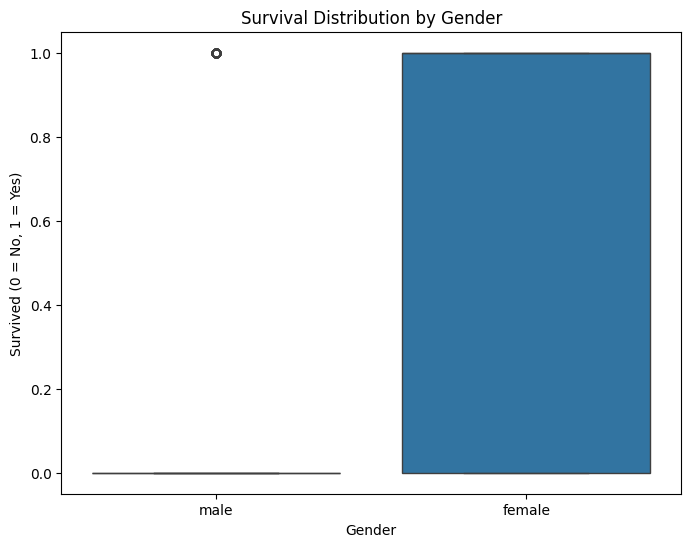

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# 1. Calculate the mean survival rates for each gender
mean_survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("\nMean survival rates by gender:")
print(mean_survival_by_gender)

# 2. Create a visualization to show survival distributions by gender
plt.figure(figsize=(8, 6))

# Create a boxplot for survival by gender
sns.boxplot(x='Sex', y='Survived', data=df)

# Add title and labels
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survived (0 = No, 1 = Yes)')

# Show the plot
plt.show()


**Problem - 5:**

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).


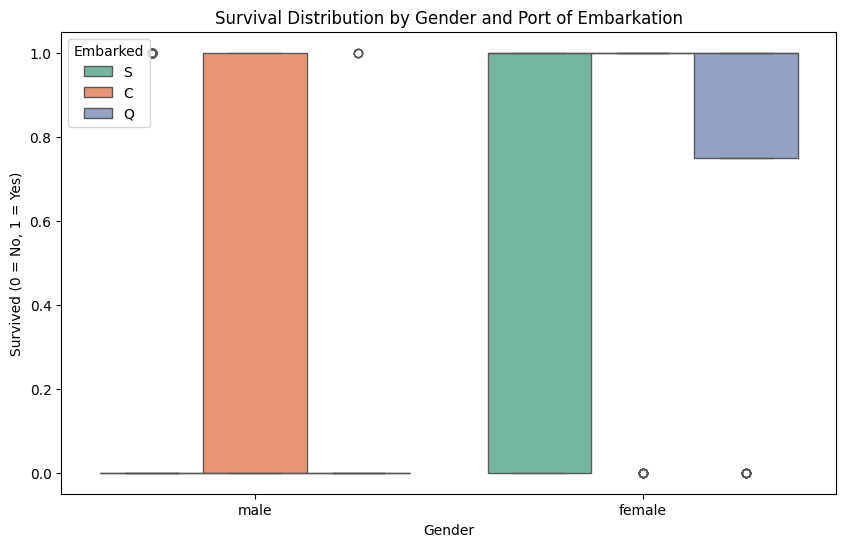

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# 1. Create a boxplot to compare survival distributions by gender and port of embarkation
plt.figure(figsize=(10, 6))

# Create a boxplot with 'Sex' on the x-axis, 'Survived' on the y-axis, and 'Embarked' as the hue
sns.boxplot(x='Sex', y='Survived', hue='Embarked', data=df, palette="Set2")

# Add title and labels
plt.title('Survival Distribution by Gender and Port of Embarkation')
plt.xlabel('Gender')
plt.ylabel('Survived (0 = No, 1 = Yes)')

# Show the plot
plt.show()


**Problem - 6{Optional}:**

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the ’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class and age group. Draw a visualization using a any plotting library to represent this graphically.


<ipython-input-12-0ff333a3e65a>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()


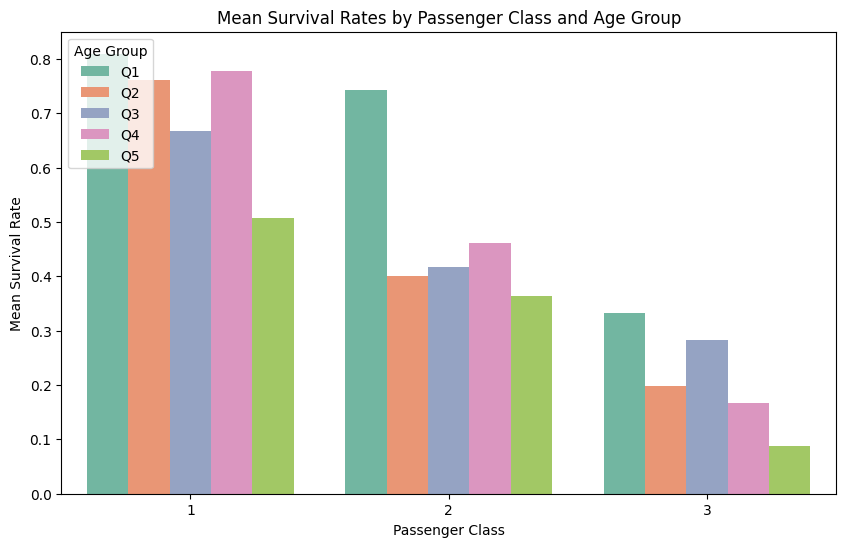

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# 1. Divide the 'Age' column into five quantiles
age_groups = pd.qcut(df['Age'].dropna(), 5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

# Add the age group labels to the DataFrame
df['AgeGroup'] = age_groups

# 2. Group by 'Pclass' and 'AgeGroup', and calculate the mean survival rate for each group
mean_survival_by_class_age = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()

# 3. Create a bar plot to visualize the mean survival rates by Pclass and Age Group
plt.figure(figsize=(10, 6))

# Create a barplot with 'Pclass' on the x-axis, 'Survived' on the y-axis, and 'AgeGroup' as hue
sns.barplot(x='Pclass', y='Survived', hue='AgeGroup', data=mean_survival_by_class_age, palette="Set2")

# Add title and labels
plt.title('Mean Survival Rates by Passenger Class and Age Group')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Survival Rate')
plt.legend(title="Age Group", loc='upper left')

# Show the plot
plt.show()
